In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
cwd = os.getcwd()
cst_data = pd.read_csv(cwd + '/customer_booking.csv', encoding='ISO-8859-1')

## Exploratory Data Analysis

In [3]:
cst_data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
cst_data.shape

(50000, 14)

In [5]:
cst_data.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [6]:
cst_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [7]:
rndtrp = round(cst_data.trip_type.value_counts().values[0]/ cst_data.trip_type.count() *100, 2)
oneway = round(cst_data.trip_type.value_counts().values[1]/ cst_data.trip_type.count() *100, 2)
circle = round(cst_data.trip_type.value_counts().values[2]/ cst_data.trip_type.count() *100, 2)
print(f"Percentage of round trips: {rndtrp}%")
print(f"Percentage of One way trips: {oneway}%")
print(f"Percentage of circle trips: {circle}%")

Percentage of round trips: 98.99%
Percentage of One way trips: 0.77%
Percentage of circle trips: 0.23%


In [8]:
internet = round(cst_data.sales_channel.value_counts().values[0]  / cst_data.sales_channel.count() *100, 2)
mob = round(cst_data.sales_channel.value_counts().values[1]  / cst_data.sales_channel.count() *100, 2)
print(f"Number of bookings done through internet: {internet}%")
print(f"Number of bookings done through phone call: {mob}%")

Number of bookings done through internet: 88.76%
Number of bookings done through phone call: 11.24%


<AxesSubplot:xlabel='purchase_lead'>

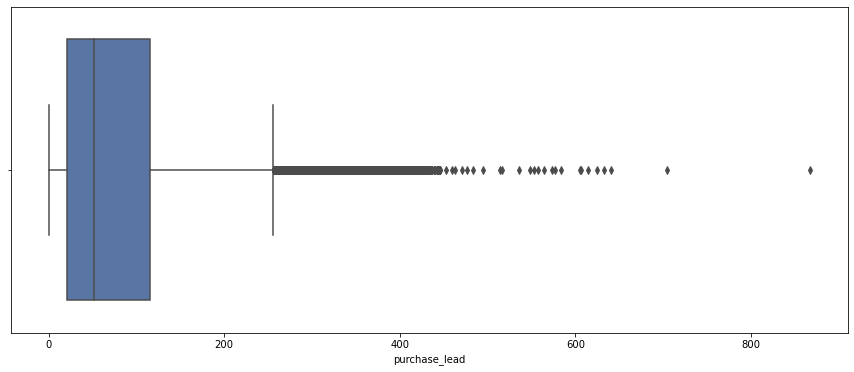

In [9]:
plt.figure(figsize=(15,6))
sns.boxplot(x=cst_data['purchase_lead'], palette='deep')

As we cannot remove all the data shown as outliers in the boxplot, we can use a Histogram KDE plot to have a clearer view.

<AxesSubplot:xlabel='purchase_lead', ylabel='Count'>

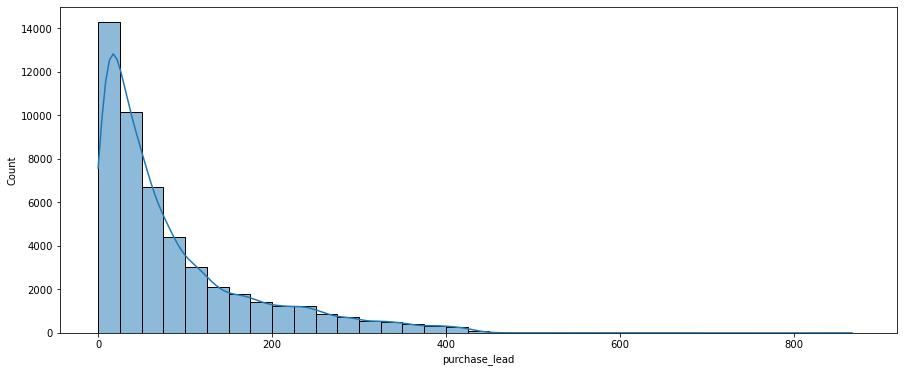

In [10]:
plt.figure(figsize=(15,6))
sns.histplot(data=cst_data, x="purchase_lead", binwidth=25,kde=True, palette='deep')

In [11]:
(cst_data.purchase_lead >550).value_counts()

False    49986
True        14
Name: purchase_lead, dtype: int64

In [12]:
cst_data = cst_data[cst_data.purchase_lead <550 ]

<AxesSubplot:xlabel='length_of_stay'>

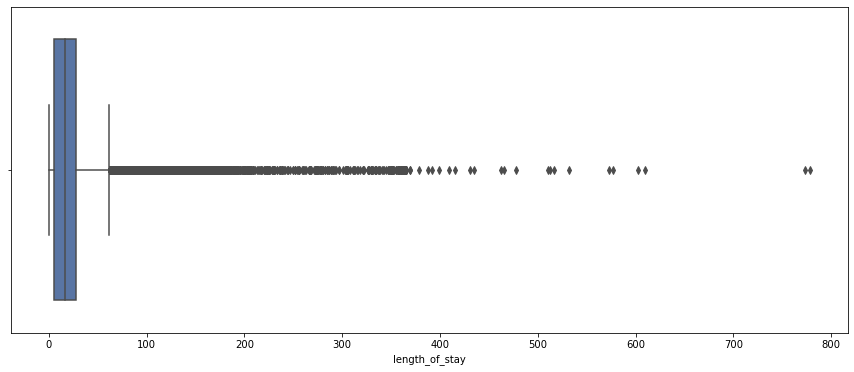

In [13]:
plt.figure(figsize=(15,6))
sns.boxplot(x=cst_data['length_of_stay'], palette='deep')

As we cannot remove all the data shown as outliers in the boxplot, again, we can use a Histogram KDE plot to have a clearer view.

<AxesSubplot:xlabel='length_of_stay', ylabel='Count'>

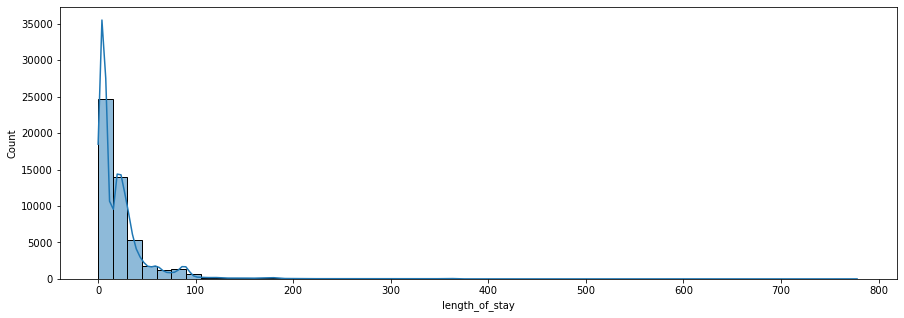

In [14]:
plt.figure(figsize=(15,5))
sns.histplot(data=cst_data, x="length_of_stay", binwidth=15,kde=True, palette='deep')

In [15]:
(cst_data.length_of_stay> 100).value_counts()

False    48848
True      1138
Name: length_of_stay, dtype: int64

In [16]:
cst_data[cst_data.length_of_stay > 500].booking_complete.value_counts()

0    9
1    1
Name: booking_complete, dtype: int64

In [17]:
cst_data = cst_data[cst_data.purchase_lead < 500 ]

In [18]:
cst_data.flight_day.value_counts()

Mon    8100
Wed    7671
Tue    7670
Thu    7423
Fri    6759
Sun    6550
Sat    5809
Name: flight_day, dtype: int64

Text(0, 0.5, 'Number of bookings')

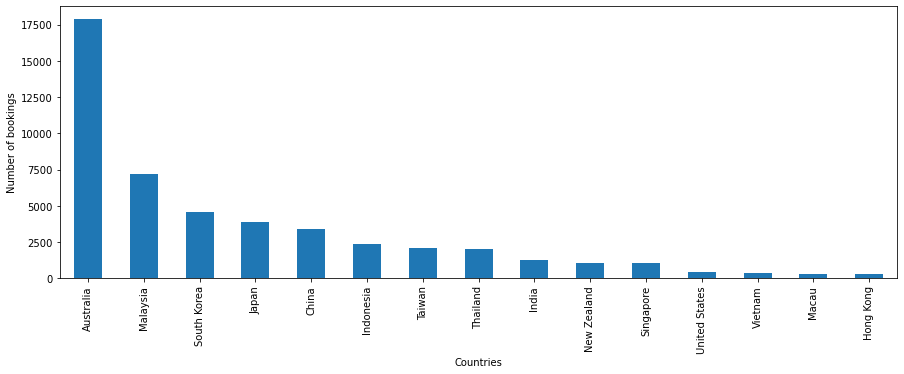

In [19]:
plt.figure(figsize=(15,5))
ax = cst_data.booking_origin.value_counts()[:15].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of bookings")

Text(0, 0.5, 'Number of complete bookings')

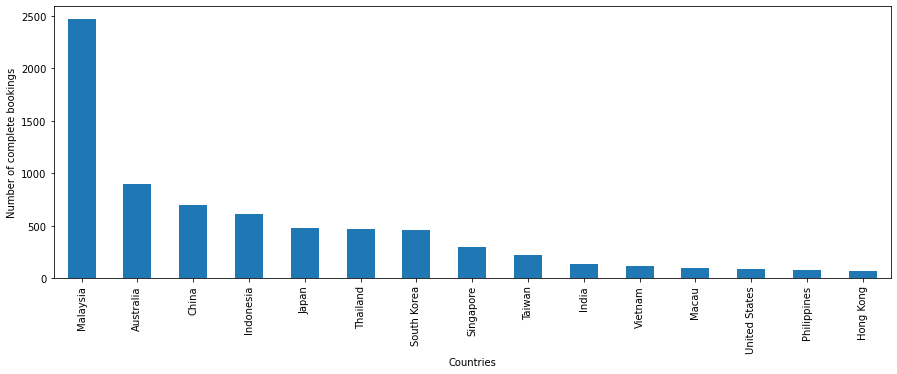

In [20]:
plt.figure(figsize=(15,5))
ax = cst_data[cst_data.booking_complete == 1].booking_origin.value_counts()[:15].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of complete bookings")

In [21]:
succ_booking = cst_data.booking_complete.value_counts().values[1] / len(cst_data) * 100

In [22]:
print(f"Out of 50000 booking entries only {round(succ_booking,2)}% bookings were successfull or complete.")

Out of 50000 booking entries only 14.96% bookings were successfull or complete.


## Predictive Model

In [23]:
cst_data = cst_data.reset_index(drop=True)

In [24]:
cst_data

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49978,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49979,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49980,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [25]:
cst_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49982 entries, 0 to 49981
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         49982 non-null  int64  
 1   sales_channel          49982 non-null  object 
 2   trip_type              49982 non-null  object 
 3   purchase_lead          49982 non-null  int64  
 4   length_of_stay         49982 non-null  int64  
 5   flight_hour            49982 non-null  int64  
 6   flight_day             49982 non-null  object 
 7   route                  49982 non-null  object 
 8   booking_origin         49982 non-null  object 
 9   wants_extra_baggage    49982 non-null  int64  
 10  wants_preferred_seat   49982 non-null  int64  
 11  wants_in_flight_meals  49982 non-null  int64  
 12  flight_duration        49982 non-null  float64
 13  booking_complete       49982 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [26]:
encoder = OneHotEncoder(handle_unknown = 'ignore')

encoder_df = pd.DataFrame(encoder.fit_transform(cst_data[['sales_channel']]).toarray())
encoder_df = encoder_df.rename(columns={0:'Internet', 1:'Mobile'})
cst_data = cst_data.join(encoder_df)

encoder_df = pd.DataFrame(encoder.fit_transform(cst_data[['trip_type']]).toarray())
encoder_df = encoder_df.rename(columns={0:'RoundTrip', 1:'OneWayTrip', 2:'CircleTrip'})
cst_data = cst_data.join(encoder_df)

In [27]:
cst_data.drop(['sales_channel', 'trip_type', 'booking_origin', 'route'], axis=1, inplace=True)

In [28]:
cst_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49982 entries, 0 to 49981
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         49982 non-null  int64  
 1   purchase_lead          49982 non-null  int64  
 2   length_of_stay         49982 non-null  int64  
 3   flight_hour            49982 non-null  int64  
 4   flight_day             49982 non-null  object 
 5   wants_extra_baggage    49982 non-null  int64  
 6   wants_preferred_seat   49982 non-null  int64  
 7   wants_in_flight_meals  49982 non-null  int64  
 8   flight_duration        49982 non-null  float64
 9   booking_complete       49982 non-null  int64  
 10  Internet               49982 non-null  float64
 11  Mobile                 49982 non-null  float64
 12  RoundTrip              49982 non-null  float64
 13  OneWayTrip             49982 non-null  float64
 14  CircleTrip             49982 non-null  float64
dtypes:

In [29]:
mapping = {"Mon" : 1, "Tue" : 2, "Wed" : 3, "Thu" : 4, "Fri" : 5, "Sat" : 6, "Sun" : 7}

cst_data.flight_day = cst_data.flight_day.map(mapping)

In [30]:
cst_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49982 entries, 0 to 49981
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         49982 non-null  int64  
 1   purchase_lead          49982 non-null  int64  
 2   length_of_stay         49982 non-null  int64  
 3   flight_hour            49982 non-null  int64  
 4   flight_day             49982 non-null  int64  
 5   wants_extra_baggage    49982 non-null  int64  
 6   wants_preferred_seat   49982 non-null  int64  
 7   wants_in_flight_meals  49982 non-null  int64  
 8   flight_duration        49982 non-null  float64
 9   booking_complete       49982 non-null  int64  
 10  Internet               49982 non-null  float64
 11  Mobile                 49982 non-null  float64
 12  RoundTrip              49982 non-null  float64
 13  OneWayTrip             49982 non-null  float64
 14  CircleTrip             49982 non-null  float64
dtypes:

In [31]:
label = cst_data['booking_complete']

In [32]:
cst_data.to_csv(cwd + "/filtered_customer_booking.csv")

In [33]:
cst_data = cst_data.drop('booking_complete', axis=1)

In [34]:
cst_data

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTrip,OneWayTrip,CircleTrip
0,2,262,19,7,6,1,0,0,5.52,1.0,0.0,0.0,0.0,1.0
1,1,112,20,3,6,0,0,0,5.52,1.0,0.0,0.0,0.0,1.0
2,2,243,22,17,3,1,1,0,5.52,1.0,0.0,0.0,0.0,1.0
3,1,96,31,4,6,0,0,1,5.52,1.0,0.0,0.0,0.0,1.0
4,2,68,22,15,3,1,0,1,5.52,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,2,27,6,9,6,1,0,1,5.62,1.0,0.0,0.0,0.0,1.0
49978,1,111,6,4,7,0,0,0,5.62,1.0,0.0,0.0,0.0,1.0
49979,1,24,6,22,6,0,0,1,5.62,1.0,0.0,0.0,0.0,1.0
49980,1,15,6,11,1,1,0,1,5.62,1.0,0.0,0.0,0.0,1.0


In [35]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(cst_data)

In [36]:
scaled_df

array([[ 0.40076882,  1.9710928 , -0.11940053, ..., -0.04823105,
        -0.08833576,  0.10082623],
       [-0.57942433,  0.30298741, -0.08989529, ..., -0.04823105,
        -0.08833576,  0.10082623],
       [ 0.40076882,  1.75979945, -0.03088481, ..., -0.04823105,
        -0.08833576,  0.10082623],
       ...,
       [-0.57942433, -0.67563441, -0.50296865, ..., -0.04823105,
        -0.08833576,  0.10082623],
       [-0.57942433, -0.77572073, -0.50296865, ..., -0.04823105,
        -0.08833576,  0.10082623],
       [-0.57942433, -0.73123792, -0.50296865, ..., -0.04823105,
        -0.08833576,  0.10082623]])

In [37]:
scaled_df = pd.DataFrame(scaled_df, columns= cst_data.columns)

In [38]:
scaled_df['label']  = label

In [39]:
scaled_df

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTrip,OneWayTrip,CircleTrip,label
0,0.400769,1.971093,-0.119401,-0.381588,1.096876,0.703587,-0.650054,-0.863557,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
1,-0.579424,0.302987,-0.089895,-1.120618,1.096876,-1.421288,-0.650054,-0.863557,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
2,0.400769,1.759799,-0.030885,1.465988,-0.408618,0.703587,1.538334,-0.863557,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
3,-0.579424,0.125056,0.234662,-0.935861,1.096876,-1.421288,-0.650054,1.158002,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
4,0.400769,-0.186323,-0.030885,1.096473,-0.408618,0.703587,-0.650054,1.158002,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,0.400769,-0.642272,-0.502969,-0.012073,1.096876,0.703587,-0.650054,1.158002,-1.107240,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
49978,-0.579424,0.291867,-0.502969,-0.935861,1.598707,-1.421288,-0.650054,-0.863557,-1.107240,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
49979,-0.579424,-0.675634,-0.502969,2.389776,1.096876,-1.421288,-0.650054,1.158002,-1.107240,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
49980,-0.579424,-0.775721,-0.502969,0.357443,-1.412280,0.703587,-0.650054,1.158002,-1.107240,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0


<AxesSubplot:>

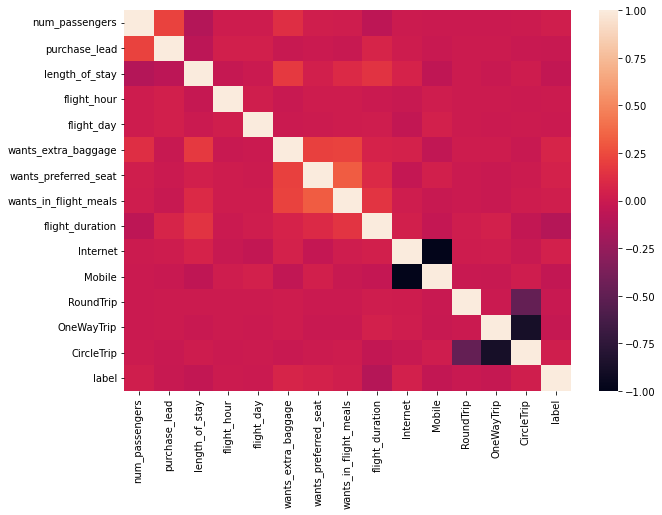

In [40]:
corr = scaled_df.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr)

In [41]:
X = scaled_df.iloc[:,:-1]
y = scaled_df['label']

X_train, X_test, Y_train, Y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.2, random_state=1)

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.inspection import permutation_importance

from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import GridSearchCV,  RepeatedStratifiedKFold

In [43]:
def model_fit_predict(model, X, Y, X_predict):
    model.fit(X, Y)
    return model.predict(X_predict)

def acc_score(Y_true, Y_pred):
    return accuracy_score(Y_true, Y_pred)

def pre_score(Y_true, Y_pred):
    return precision_score(Y_true, Y_pred)

def f_score(Y_true, Y_pred):
    return f1_score(Y_true, Y_pred)

In [44]:
clf_rf = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)

In [45]:
Y_pred_train = model_fit_predict(clf_rf, X_train, Y_train, X_train)
set(Y_pred_train)

f1 = round(f1_score(Y_train, Y_pred_train),2) 
acc = round(accuracy_score(Y_train, Y_pred_train),2) 
pre = round(precision_score(Y_train, Y_pred_train),2) 

print(f"TRAINING DATA SCORES:\nAccuracy-Score: {acc},\nPrecision-Score: {pre},\nF1-score: {f1}")

TRAINING DATA SCORES:
Accuracy-Score: 0.93,
Precision-Score: 1.0,
F1-score: 0.72


0.934950606477429

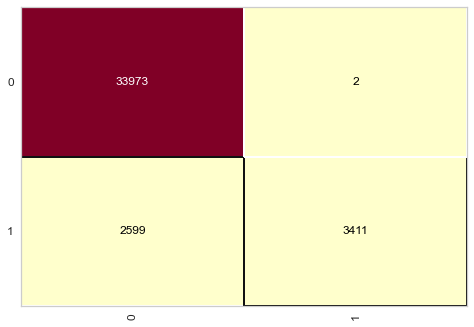

In [46]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, Y_train)

cm.score(X_train, Y_train)

In [47]:
clf_rf = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=1)

In [48]:
Y_pred_test = model_fit_predict(clf_rf, X_train, Y_train, X_test)

In [49]:
f1 = round(f1_score(Y_test, Y_pred_test),2) 
acc = round(accuracy_score(Y_test, Y_pred_test),2) 
pre = round(precision_score(Y_test, Y_pred_test),2) 

print(f"TEST DATA SCORES:\nAccuracy-Score: {acc},\nPrecision-Score: {pre},\nF1-score: {f1}")

TEST DATA SCORES:
Accuracy-Score: 0.85,
Precision-Score: 0.47,
F1-score: 0.06


0.8526557967390217

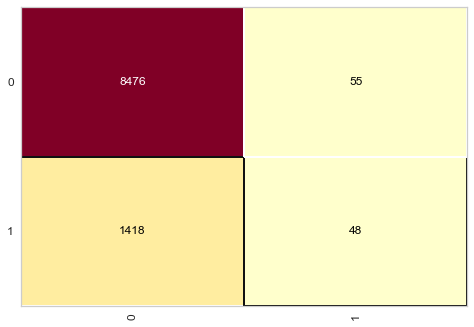

In [50]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, Y_train)

cm.score(X_test, Y_test)

Text(0.5, 0, 'Random Forest Feature Importance')

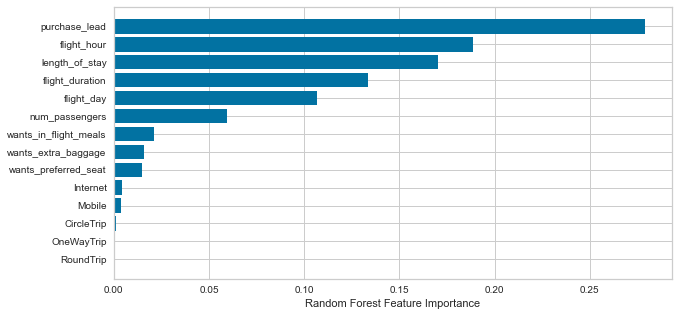

In [51]:
plt.figure(figsize=(10,5))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [52]:
scaled_df.label.value_counts()

0    42506
1     7476
Name: label, dtype: int64

In [53]:
scaled_df_0 = scaled_df[scaled_df.label ==0].sample(n=8000)

In [54]:
scaled_df_new = pd.concat([scaled_df[scaled_df.label==1], scaled_df_0], ignore_index=True)

In [55]:
scaled_df_new = scaled_df_new.sample(frac = 1).reset_index(drop=True)

In [56]:
scaled_df_new

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTrip,OneWayTrip,CircleTrip,label
0,-0.579424,0.581005,-0.591484,0.726958,1.598707,0.703587,1.538334,-0.863557,-0.185282,0.355786,-0.355786,-0.048231,-0.088336,0.100826,1
1,0.400769,0.080573,5.162037,1.096473,0.093214,0.703587,1.538334,1.158002,0.870293,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
2,-0.579424,-0.875807,0.205157,-0.566346,-0.408618,0.703587,-0.650054,-0.863557,-1.741921,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
3,-0.579424,-0.508824,-0.591484,0.172685,-0.910449,-1.421288,1.538334,1.158002,-1.107240,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
4,-0.579424,1.804282,-0.532474,0.172685,0.595045,0.703587,1.538334,-0.863557,-0.632900,0.355786,-0.355786,-0.048231,-0.088336,0.100826,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15471,5.301735,-0.397617,-0.502969,-0.012073,1.096876,0.703587,-0.650054,1.158002,-1.708517,0.355786,-0.355786,-0.048231,-0.088336,0.100826,1
15472,-0.579424,-0.775721,-0.591484,0.911715,1.096876,-1.421288,-0.650054,-0.863557,-1.300985,0.355786,-0.355786,-0.048231,-0.088336,0.100826,1
15473,-0.579424,-0.731238,8.968213,-1.490134,1.598707,-1.421288,-0.650054,1.158002,1.037314,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
15474,-0.579424,-0.275289,0.057631,-0.381588,1.598707,0.703587,1.538334,1.158002,0.870293,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0


In [57]:
X = scaled_df_new.iloc[:,:-1]
y = scaled_df_new['label']

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)

In [58]:
clf_rf = RandomForestClassifier(n_estimators=50,max_depth =50 , min_samples_split=5,random_state=0)

In [62]:
y_pred_test = model_fit_predict(clf_rf, X_train, y_train, X_test)

f1 = round(f1_score(y_test, y_pred_test),2) 
acc = round(accuracy_score(y_test, y_pred_test),2) 
pre = round(precision_score(y_test, y_pred_test),2) 

print(f"TEST DATA SCORES:\nAccuracy-Score: {acc},\nPrecision-Score: {pre},\nF1-score: {f1}")

TEST DATA SCORES:
Accuracy-Score: 0.64,
Precision-Score: 0.63,
F1-score: 0.63


0.6417958656330749

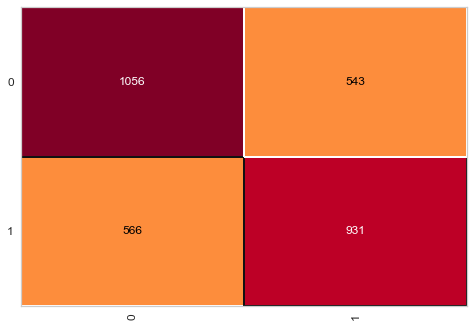

In [60]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

Text(0.5, 0, 'Random Forest Feature Importance')

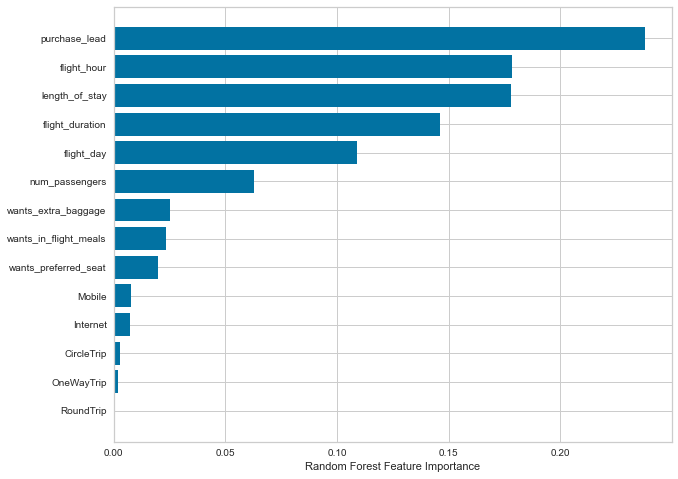

In [61]:
plt.figure(figsize=(10,8))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")